In [1]:
import cv2 as cv
import numpy as np
from src.sub_processes import *
from matplotlib import pyplot as plt
import time

In [4]:
#Write down conf, nms thresholds,inp width/height
confThreshold = 0.25
nmsThreshold = 0.40
inpWidth = 416
inpHeight = 416
Tol = 0.35

#Load names of classes and turn that into a list
classesFile = "coco.names"
classes = None

with open(classesFile,'rt') as f:
    classes = f.read().rstrip('\n').split('\n')

#Model configuration
modelConf = 'yolov3.cfg'
modelWeights = 'yolov3.weights'

#Set up the net

net = cv.dnn.readNetFromDarknet(modelConf, modelWeights)
net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv.dnn.DNN_TARGET_CPU)


#Process inputs
winName = 'DL OD with OpenCV'
cv.namedWindow(winName, cv.WINDOW_NORMAL)
cv.resizeWindow(winName, 1000,1000)

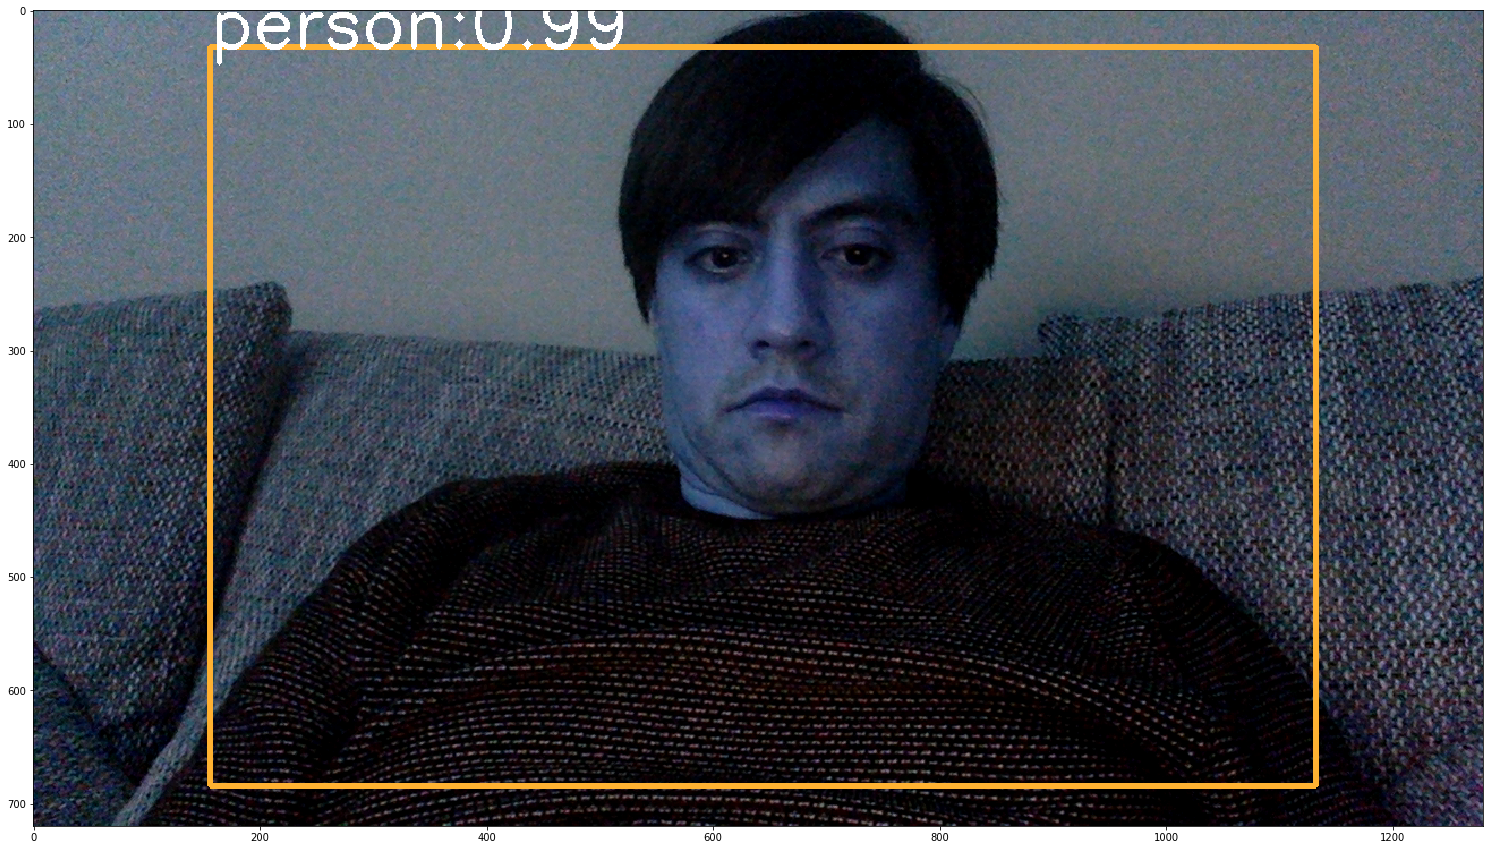

2 objects identified
0 vehicles correctly identified


In [5]:
cap = cv.VideoCapture(0)
time.sleep(5)

#get frame from video
hasFrame, frame = cap.read()

#Create a 4D blob from a frame
blob = cv.dnn.blobFromImage(frame, 1/255, (inpWidth, inpHeight), [0,0,0], 10, crop = False)

#Set the input the the net
net.setInput(blob)
outs = net.forward(getOutputsNames(net))

classIDs, confidences = postprocess (frame, outs, classes, confThreshold, nmsThreshold)

#show the image
#cv.imshow(winName, frame)
#cv.waitKey(0)
#cv.destroyAllWindows()

fig, ax = plt.subplots(figsize=(40, 15))
webcam_preview = ax.imshow(frame) 
webcam_preview.set_data(frame)
plt.draw()
plt.pause(0.05)
cap.release()

print(str(len(classIDs)) + ' objects identified')
cont_corr = 0
for idx1,idx2 in enumerate(classIDs):
    if classes[classIDs[idx1]]=='car' or classes[classIDs[idx1]]=='truck' or classes[classIDs[idx1]]=='motorbike' or classes[classIDs[idx1]]=='bus':
        if confidences[idx1] >= Tol:
            print(classes[classIDs[idx1]]+', '+str(confidences[idx1]))
            cont_corr += 1
print(str(cont_corr) + ' vehicles correctly identified')

In [59]:
classIDs[idx1]

2